In [1]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import DBSCAN
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import libpysal

In [2]:
from shapely import wkt

blocks = pd.read_csv("data/Census_Block_Groups_2020_20240126.csv")
blocks['geometry'] = blocks['the_geom'].apply(wkt.loads)
blocks.drop(columns=['the_geom'], inplace=True)
blocks = gpd.GeoDataFrame(blocks, crs='EPSG:4326')
blocks

,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,geometry
0,1807,60730200191,200191,20019,1,19520.779251,1.281500e+07,"MULTIPOLYGON (((-117.20764 33.14182, -117.2077..."
1,1676,60730189034,189034,18903,4,10026.669194,5.460566e+06,"MULTIPOLYGON (((-117.25339 33.39086, -117.2527..."
2,878,60730108001,108001,10800,1,8502.270733,3.821664e+06,"MULTIPOLYGON (((-117.17970 32.68618, -117.1798..."
3,1009,60730133211,133211,13321,1,8139.283833,3.846955e+06,"MULTIPOLYGON (((-116.95831 32.62129, -116.9582..."
4,1061,60730134232,134232,13423,2,69292.332370,1.599042e+08,"MULTIPOLYGON (((-116.96373 32.70351, -116.9636..."
...,...,...,...,...,...,...,...,...
2052,1770,60730198031,198031,19803,1,29357.559885,1.915028e+07,"MULTIPOLYGON (((-117.29525 33.17992, -117.2946..."
2053,28,60730008002,8002,800,2,5298.407410,1.534904e+06,"MULTIPOLYGON (((-117.13792 32.74383, -117.1379..."
2054,1677,60730189041,189041,18904,1,7466.510835,3.467576e+06,"MULTIPOLYGON (((-117.25363 33.37684, -117.2536..."
2055,1628,60730186012,186012,18601,2,15011.933296,9.543736e+06,"MULTIPOLYGON (((-117.34560 33.23710, -117.3448..."


In [3]:
df = gpd.read_file('C:/Users/kng/OneDrive - San Diego Association of Governments/Documents/DSC Capstone/data/BUSINESS_SITES.shp')
df = df[df['POINT_X'] >= 10]
df = df.to_crs(blocks.crs)
df

,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,...,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,...,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,...,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,...,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,...,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,...,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98158,0.000000e+00,261.0,XTRA INC,OFFICE EQUIP&FURN SEE APT HSE,#472-440-02-00,None,0.0,None,None,None,...,None,UNIVERSITY,AVE,None,SAN DIEGO,APARTMENTS,5802 UNIVERSITY AVE,6.308874e+06,1.853500e+06,POINT (-117.07218 32.74956)
98159,0.000000e+00,264.0,HONEYCOMB BUSINESS,(A CALIF CORP),DBA LA PETITE ROUGE,None,6840.0,None,None,EL CAJON,...,None,EL CAJON,BLVD,None,SAN DIEGO,MOTEL FURNISHINGS,6844 EL CAJON BLVD,6.315622e+06,1.860472e+06,POINT (-117.05041 32.76886)
98160,0.000000e+00,298.0,ADVANCED LOGISTICS TECH INC,EQUIPMENT LOCATED AT NAVAL,COMM CONTROL & OCEAN SURV CTR,None,7968.0,None,None,ARJONS,...,None,CATALINA,BLVD,None,SAN DIEGO,MISC PROFESSIONAL,271 CATALINA BLVD,6.254424e+06,1.839227e+06,POINT (-117.24882 32.70902)
98161,0.000000e+00,298.0,AT&T,EQUIPMENT LOCATED AT NAVAL,COMM CONTROL & OCEAN SURV CTR,None,3940.0,None,None,7TH,...,None,CATALINA,BLVD,None,SAN DIEGO,MISC PROFESSIONAL,271 CATALINA BLVD,6.254424e+06,1.839227e+06,POINT (-117.24882 32.70902)


In [29]:
# https://gis.stackexchange.com/questions/439823/draw-polygons-around-a-set-of-points-and-create-clusters-in-python

coords = df[['POINT_X', 'POINT_Y']]

db = DBSCAN(eps=1200, min_samples=500, metric='haversine').fit(coords)

In [25]:
cluster_labels = pd.Series(db.labels_)
cluster_labels.value_counts()

-1    91758
 0     3320
 2     1081
 1      838
 4      592
 3      574
Name: count, dtype: int64

<Axes: >

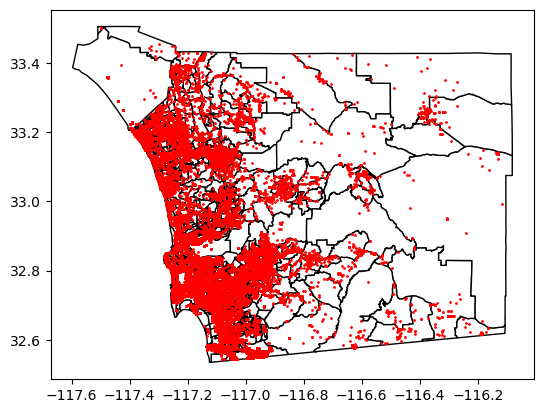

In [4]:
base = blocks.plot(color='white', edgecolor='black')

df.plot(ax=base, marker='o', color='red', markersize=1)

In [4]:
joined_blocks = df.sjoin_nearest(blocks)

c:\Users\kng\AppData\Local\anaconda3\envs\gpd\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [5]:
joined_blocks

,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,...,POINT_Y,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,...,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,...,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,...,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,...,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,...,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,...,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,...,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,...,1.809162e+06,POINT (-117.13048 32.62729),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,...,1.830181e+06,POINT (-117.16765 32.68479),1820,880,60730109001,109001,10900,1,14964.745417,1.002034e+07


In [6]:
# Map this to blocks (would prob make things less confusing)
joined_blocks['CTBLOCKGROUP'].value_counts()



CTBLOCKGROUP
83501     2677
85112     2417
83391     1459
100152    1375
162021    1358
          ... 
32011        1
32092        1
171042       1
32084        1
95102        1
Name: count, Length: 1926, dtype: int64

In [11]:
joined_blocks.geometry.x

0       -117.498891
1       -117.498891
2       -117.498891
3       -117.498891
4       -117.498891
            ...    
95648   -117.132925
95649   -117.132925
95650   -117.130477
95659   -117.167646
97842   -117.111539
Length: 98162, dtype: float64

In [7]:
top_75 = blocks.loc[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:75].index)]

top_75['business_count'] = top_75['CTBLOCKGROUP'].map(joined_blocks.CTBLOCKGROUP.value_counts())

c:\Users\kng\AppData\Local\anaconda3\envs\gpd\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [8]:
top_75

,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,geometry,business_count
32,1140,60730146013,146013,14601,3,12396.363444,7.324732e+06,"MULTIPOLYGON (((-117.02274 32.76920, -117.0222...",279
41,450,60730082012,82012,8201,2,10093.861484,5.109206e+06,"MULTIPOLYGON (((-117.26754 32.84731, -117.2673...",455
53,354,60730065001,65001,6500,1,22670.240738,1.949492e+07,"MULTIPOLYGON (((-117.20373 32.75800, -117.2036...",525
56,1492,60730173072,173072,17307,2,18233.758971,1.113105e+07,"MULTIPOLYGON (((-117.25992 32.98704, -117.2599...",266
146,547,60730083602,83602,8360,2,20590.760505,1.936358e+07,"MULTIPOLYGON (((-117.12597 32.90535, -117.1256...",431
...,...,...,...,...,...,...,...,...,...
2001,2057,60730221024,221024,22102,4,22017.532142,2.273210e+07,"MULTIPOLYGON (((-117.26728 33.11984, -117.2674...",455
2014,1786,60730198111,198111,19811,1,53107.051846,7.668259e+07,"MULTIPOLYGON (((-117.27647 33.14364, -117.2761...",540
2017,2048,60730219001,219001,21900,1,49382.928688,8.076706e+07,"MULTIPOLYGON (((-117.12493 32.67179, -117.1247...",586
2022,1063,60730134242,134242,13424,2,18024.478201,1.235868e+07,"MULTIPOLYGON (((-116.97125 32.65694, -116.9712...",227


In [68]:
closest_block = []

for row in blocks.iterrows():
    # Get the centroid of current block we're on
    row_geom = row[1].loc['geometry'].centroid
    # Get the distance between that block and every geometry in the top 75 & select top 5 to pick from
    closest_distances = top_75.geometry.centroid.distance(row_geom).sort_values().iloc[:5]#.idxmin()
    # Add closest block to list
    # Get closest distances -> get those indexes from counts of blocks -> then get max from that list and use that max as the "closest" block
    closest_block.append(top_75.loc[((top_75.loc[closest_distances.index]['business_count'] * 0.5) + (1e4 - closest_distances)).idxmax()]['CTBLOCKGROUP'])

closest_block
    
        

C:\Users\kng\AppData\Local\Temp\ipykernel_7808\841928654.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  closest_distances = top_75.geometry.centroid.distance(row_geom).sort_values().iloc[:5]#.idxmin()
C:\Users\kng\AppData\Local\Temp\ipykernel_7808\841928654.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  closest_distances = top_75.geometry.centroid.distance(row_geom).sort_values().iloc[:5]#.idxmin()
C:\Users\kng\AppData\Local\Temp\ipykernel_7808\841928654.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  closest_distances = top_75.geometry.centroid.distance(ro

[200294,
 200172,
 54021,
 100152,
 144001,
 219001,
 123021,
 221012,
 219001,
 203131,
 162021,
 93074,
 54021,
 54021,
 200294,
 203131,
 162021,
 200294,
 85112,
 65001,
 219001,
 162021,
 85113,
 219001,
 162021,
 83501,
 65001,
 54021,
 162021,
 93074,
 221012,
 65002,
 146013,
 221024,
 219001,
 93072,
 93074,
 162021,
 85112,
 93072,
 162021,
 83391,
 93072,
 96034,
 200294,
 162021,
 221012,
 162021,
 162021,
 203131,
 162021,
 179012,
 65001,
 65001,
 100152,
 162021,
 83692,
 170711,
 162021,
 93074,
 200294,
 170711,
 219001,
 54021,
 100152,
 219001,
 100152,
 162021,
 85112,
 93074,
 146013,
 83501,
 123021,
 93072,
 203131,
 83501,
 54021,
 85112,
 219001,
 100152,
 65001,
 221012,
 162021,
 179012,
 219001,
 83391,
 65001,
 162021,
 203131,
 200294,
 85111,
 93074,
 221012,
 54021,
 162021,
 65001,
 200172,
 219001,
 162021,
 146013,
 83391,
 132051,
 83501,
 93074,
 200294,
 93074,
 203131,
 162021,
 221012,
 170711,
 83501,
 219001,
 219001,
 200172,
 146013,
 170711,

In [55]:
closest_distances

363     0.042381
375     0.063333
322     0.102118
532     0.112837
1186    0.112944
dtype: float64

In [69]:
blocks['NEWCTBG'] = closest_block

In [70]:
pd.Series(closest_block).nunique()

33

In [71]:
new_blocks = blocks.dissolve(by='NEWCTBG').reset_index()
new_blocks.plot(color='white', edgecolor='black')


<Axes: >

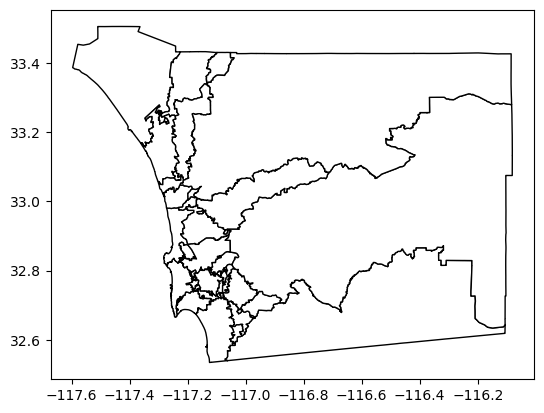

In [72]:
new_blocks.plot(color='white', edgecolor='black')

<Axes: >

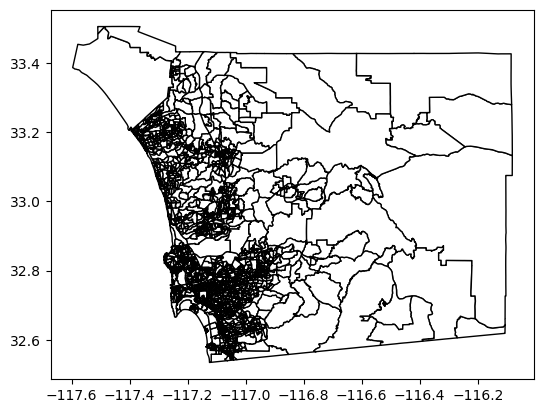

In [29]:
blocks.plot(color='white', edgecolor='black')


In [14]:
new_joined = df.sjoin_nearest(new_blocks)

c:\Users\kng\AppData\Local\anaconda3\envs\gpd\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


c:\Users\kng\AppData\Local\anaconda3\envs\gpd\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

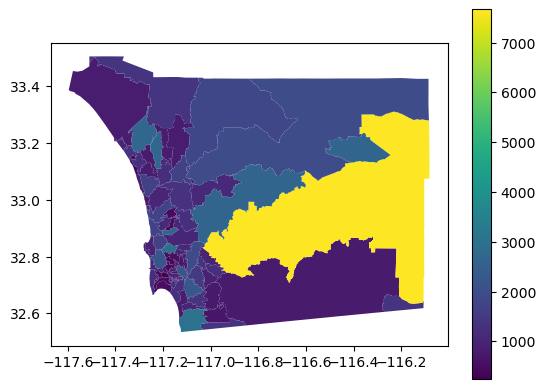

In [27]:
# pd.DataFrame([new_joined['NEWCTBG'].value_counts(), new_blocks['NEWCTBG'], new_blocks['geometry']])

final = new_blocks[['NEWCTBG', 'geometry']]

final['counts'] = final['NEWCTBG'].map(new_joined['NEWCTBG'].value_counts().to_dict())

final.plot(column='counts', legend=True)

In [85]:
# Cluster points together initially to get an idea of clusters, then use those clusters to create new shapes?

# kmeans using x, y values of businesses -> getting cluster labels -> finding nearest ctblock for those new labels, then dissolve

# Might just be better to use their k-means ++ rather than finding where things are based on the shape


from sklearn.cluster import KMeans

new_centers = blocks.loc[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts()
                                                                    .iloc[:70].index)].geometry.centroid
centers = list(zip(new_centers.x, new_centers.y))

points = pd.DataFrame([joined_blocks['geometry'].x, joined_blocks['geometry'].y]).T.rename(columns={0: 'point_x', 1: 'point_y'})

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70, init=centers)
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks
# Get centers from clusters and use them as the centers to generate cluser

C:\Users\kng\AppData\Local\Temp\ipykernel_4188\404480079.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .iloc[:70].index)].geometry.centroid
c:\Users\kng\AppData\Local\anaconda3\envs\gpd\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kng\AppData\Local\anaconda3\envs\gpd\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,...,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,cluster
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,...,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,28
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,...,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,28
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,...,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,28
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,...,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,28
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,...,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,...,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,67
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,...,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,67
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,...,POINT (-117.13048 32.62729),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,26
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,...,POINT (-117.16765 32.68479),1820,880,60730109001,109001,10900,1,14964.745417,1.002034e+07,50


In [83]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

<Axes: >

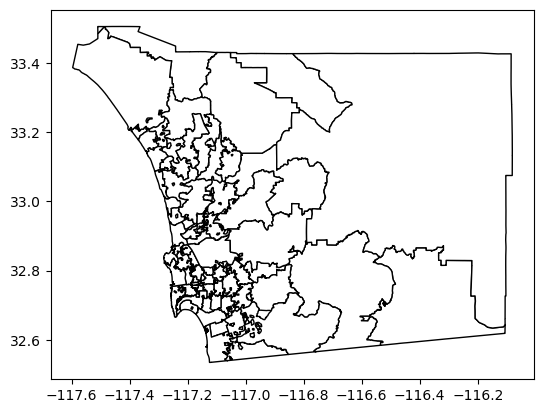

In [84]:
blocks['test'] = blocks['CTBLOCKGROUP'].map(new_dict)

new_blocks = blocks.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

<Axes: >

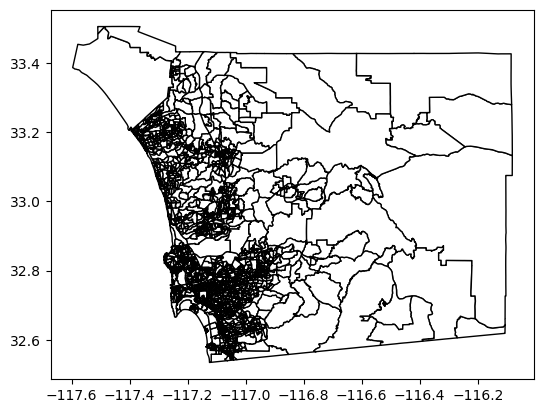

In [81]:
blocks.plot(color='white', edgecolor='black')

In [60]:
joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()

,CTBLOCKGROUP,cluster,GEOID
0,1001,6,60730001001
1,1001,18,60730001001
2,1002,18,60730001002
3,2011,6,60730002011
4,2012,6,60730002012
...,...,...,...
2167,221012,9,60730221012
2168,221021,9,60730221021
2169,221022,9,60730221022
2170,221023,9,60730221023
